<a href="https://colab.research.google.com/github/Faara34/-Optimisation-of-Travel-Routes-in-Colombo-Using-Python/blob/main/Mathcw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Modelling travel time

In [334]:

## Problem 1: Modelling Travel Time
## Problem 2: Cost Analysis Using Integration
## Problem 3: Predicting Peak Travel Times
## Problem 4: Travel Pattern Analysis Using Fourier Transform
## Problem 5: Image Processing Using Fourier and DCT


In [335]:
import sympy as sp



In [336]:
# x = distance
#y = traffic delay

#define the symbols
x, y, a, b, c = sp.symbols('x y a b c')

tb = (a*x**2) + (b*y**2)
tt = sp.sqrt(c*(x**2 + y**2))

In [337]:
grad_tb = [sp.diff(tb, x), sp.diff(tb, y)]
grad_tt = [sp.diff(tt, x), sp.diff(tt, y)]

grad_tb, grad_tt

([2*a*x, 2*b*y],
 [x*sqrt(c*(x**2 + y**2))/(x**2 + y**2),
  y*sqrt(c*(x**2 + y**2))/(x**2 + y**2)])

For buses, both distance and congestion affect travel time quadratically. This means that as distance or traffic increases, travel time increases at a faster rate. The partial derivatives shows that the rate of change of travel time itself increases with congestion and distance, and in practice congestion has a greater impact due to frequent stops and boarding delays




For taxis, both distance and congestion are combined under a square root, which smooths their effect on travel time. Meaning that taxis are less affected by congestion compared to buses.Mathematically both the factors contribute in a ablanced way. But practically, taxis can change paths inorder to avoid congestion, so distance becomes the dominant factor affecting travel time compared to traffic.

---



2. Cost Analysis using Integration

In [338]:
import matplotlib.pyplot as plt
import numpy as np

In [339]:
#a
t = sp.symbols('t')
Fb = sp.integrate( 2*t + 1 ,(t, 0,x))
Ft = sp.integrate(3*t +2 ,(t, 0,x))

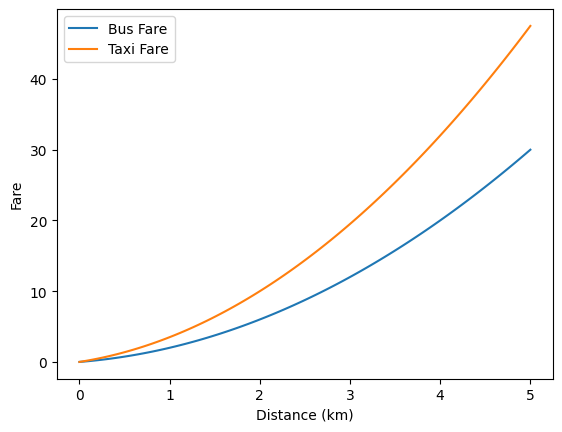

In [340]:
x_vals = np.linspace(0,5,100)
Fb_func =sp.lambdify(x, Fb, 'numpy')
Ft_funct= sp.lambdify(x, Ft, 'numpy')

plt.plot(x_vals, Fb_func(x_vals), label='Bus Fare')
plt.plot(x_vals, Ft_funct(x_vals), label='Taxi Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.legend()
plt.show()

For short distances, the difference between taxi fare and bus fare is relatively smalll, eventhough the bus remains slightly cheaper. However, the graph shows that taxi fares increase at a faster rate tham bus fares. As distance increases, this difference becomes more significant, making buses more affordable than taxis

---



3. Predicting Peak Travel times

In [341]:
t = sp.symbols ('t')
P = 5 +4*sp.sin(sp.pi*t) - (3/2)*t**2 + t**4/4

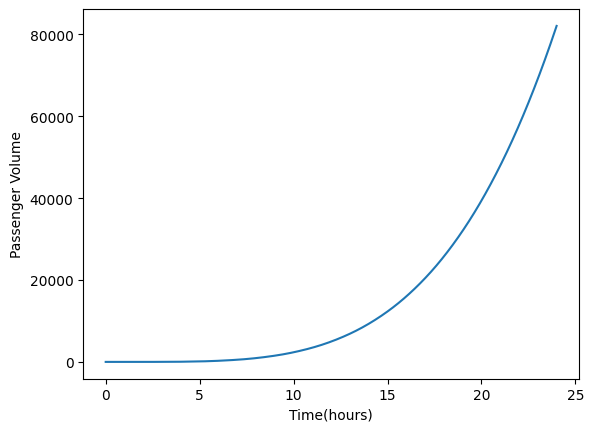

In [342]:
t_vals = np.linspace(0, 24, 500)
P_func = sp.lambdify(t, P, 'numpy')

plt.plot(t_vals, P_func(t_vals))
plt.xlabel('Time(hours)')
plt.ylabel('Passenger Volume')
plt.show()


 peak hours:  [0.48096192]

 peak volumes:  [8.65923887]


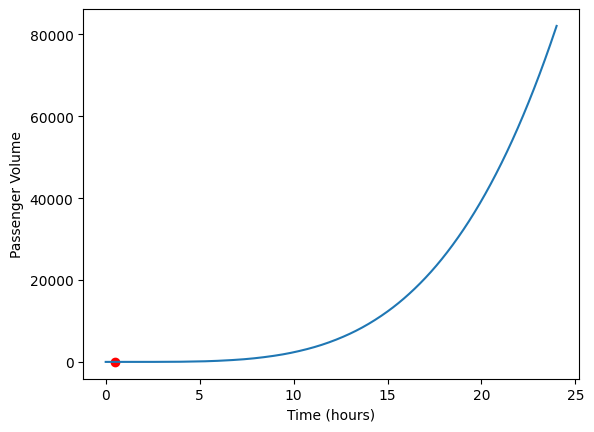

In [343]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(P_func(t_vals))
peak_times = t_vals[peaks]
print ("\n peak hours: ", peak_times)
print ("\n peak volumes: ", P_func(peak_times))
plt.plot(t_vals, P_func(t_vals))
plt.scatter(peak_times, P_func(peak_times), color='red')
plt.xlabel('Time (hours)')
plt.ylabel('Passenger Volume')
plt.show()

According to the model, the peak time is at 0.48*60 + 12.00 which is at 12.29. This result is mathematically correct, but practically its unrealistic. Colombo's peak level occur morning (7-9 AM) and evening (5-7PM) rush hours. This highlights a limitation of the model and does not fully represent the real travel behaviour

4. Travel Pattern Analysis using Fourier Transform

In [344]:
#6 am to 9 am = 15h *60/ 5 = 180
interval_length = 5/60 # interval in hours

time_intervals = np.arange(180)
actual_time = time_intervals * interval_length

In [345]:
#simulating boarding data

morning_hours = 6 #took from 6 am to 12 pm
evening_hours = 9 # rest taken for the evening
interval_perhour = 12 #60/5


morning_interval = morning_hours * interval_perhour
evening_interval = evening_hours * interval_perhour

print(morning_interval)
print(evening_interval)

72
108


In [346]:
#bus and taxi boarding counts
bus_boarding = (30 +
                20*np.sin(2*np.pi*time_intervals/morning_interval) +
                15*np.sin(2*np.pi*time_intervals/evening_interval))

In [347]:
taxi_boarding = (10 +
                 8*np.sin(2*np.pi*time_intervals/morning_interval) +
                 5*np.sin(2*np.pi*time_intervals/evening_interval))

In [348]:
#applying fourier
bus_fft = np.fft.fft(bus_boarding)
taxi_fft = np.fft.fft(taxi_boarding)

freqs = np.fft.fftfreq(180, d=interval_length)

In [349]:
#take magnitude
bus_mag = np.abs(bus_fft)
taxi_mag = np.abs(taxi_fft)

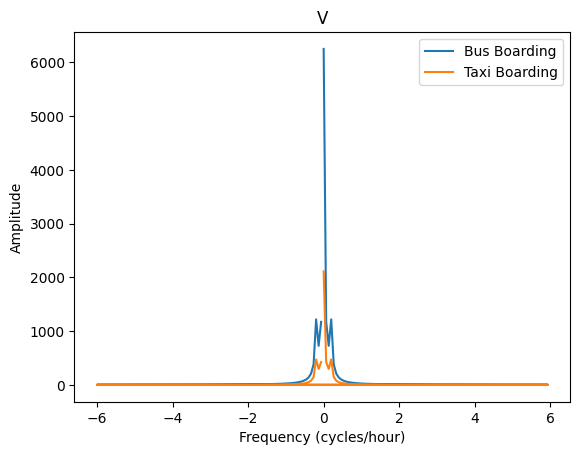

In [350]:
#plot fft
plt.plot(freqs, bus_mag, label='Bus Boarding')
plt.plot(freqs, taxi_mag, label='Taxi Boarding')
plt.xlabel('Frequency (cycles/hour)')
plt.ylabel('Amplitude')
plt.title('V')
plt.legend()
plt.show()

In [351]:
pos_mask = freqs > 0
freqs_pos = freqs[pos_mask]
bus_mag_pos = bus_mag[pos_mask]
taxi_mag_pos = taxi_mag[pos_mask]

bus_peak_index = np.argmax(bus_mag_pos)
taxi_peak_index = np.argmax(taxi_mag_pos)

bus_peak_freq = freqs_pos[bus_peak_index]
taxi_peak_freq = freqs_pos[taxi_peak_index]

bus_rush_period = 1 / bus_peak_freq
taxi_rush_period = 1 / taxi_peak_freq

print(f"Bus dominant frequency: {bus_peak_freq:.3f} cycles/hour → rush every {bus_rush_period:.2f} hours")
print(f"Taxi dominant frequency: {taxi_peak_freq:.3f} cycles/hour → rush every {taxi_rush_period:.2f} hours")



Bus dominant frequency: 0.200 cycles/hour → rush every 5.00 hours
Taxi dominant frequency: 0.200 cycles/hour → rush every 5.00 hours


The dominant frequency is 0.2 cycles/hour, indicating that passenger demand peaks approx every 5 hours

The Fourier tranform how often passenger demand peaks by revealing the dominant frequency in the boarding data. Knowing the time between peaks allows planners to allocate more buses or taxis during peak periods to handle high demand.
This helps batch vehicle availability to passenger demand, improving efficiency, reducing congestion during rush hours.


---



5.  Image Processing Using Fourier and Discrete Cosine Transforms

In [352]:
import cv2

In [353]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [354]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ehicle_plate.png')

In [355]:
#convert for proper colour display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

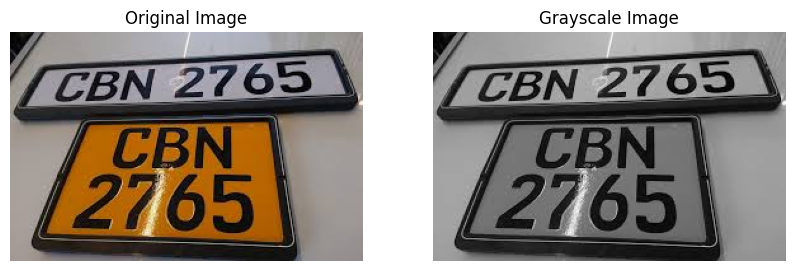

In [356]:
#display orginal and grey scale
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

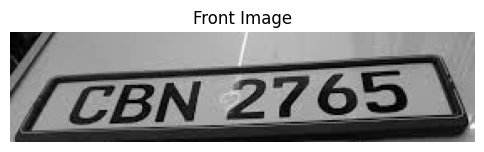

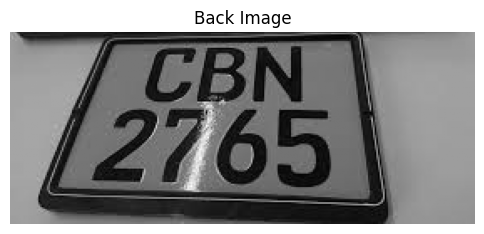

In [357]:
def show_img(img_data, title):
    plt.figure(figsize=(6, 4))
    plt.imshow(img_data, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

height, width = gray.shape
split_row = int(height * 0.37)

front_img = gray[0:split_row, :]
back_img  = gray[split_row:height, :]

show_img(front_img, 'Front Image')
show_img(back_img, 'Back Image')

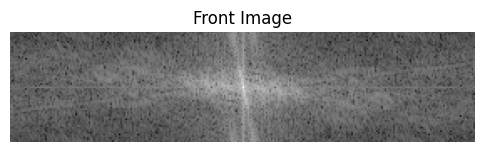

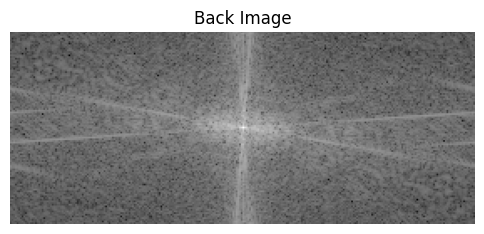

In [358]:
from numpy.fft import fftshift
#b
#apply fourier 2d transform
f_front = np.fft.fft2(front_img)
f_back = np.fft.fft2(back_img)

fshift_front = np.fft.fftshift(f_front)
fshift_back = np.fft.fftshift(f_back)

magnitude_spectrum_front = np.log(np.abs(fshift_front))
magnitude_spectrum_back = np.log(np.abs(fshift_back))

show_img(magnitude_spectrum_front, 'Front Image')
show_img(magnitude_spectrum_back, 'Back Image')



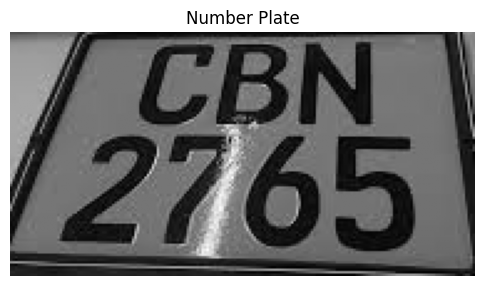

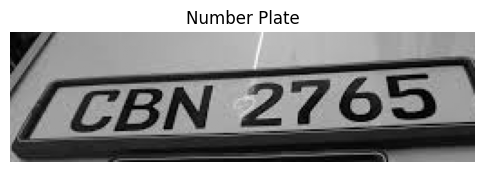

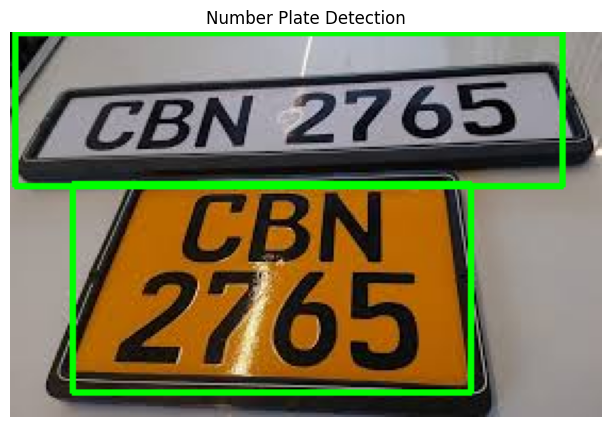

In [359]:
# Edge detection using Canny
edges = cv2.Canny(gray, 100, 200)

# Find contours
contours, _= cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#draw bounding boxes around potential number plates
plateimg = img_rgb.copy()
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    if 1.8 <aspect_ratio< 5 and w>50:
        cv2.rectangle(plateimg, (x, y), (x + w, y + h), (0, 255, 0), 2)
        plate_img = gray[y:y+h, x:x+w]
        show_img(plate_img, 'Number Plate')


plt.figure(figsize=(10,5))
plt.imshow(plateimg)
plt.title('Number Plate Detection')
plt.axis('off')
plt.show()

Foureir and DCT seperate the image into frequency components. Low frequencies show smooth areas like the plate background and the important edges/ texts (the lines radiating out) are highlighed through high frequency, making it easier to detect and recognize the characters on the plate.

this can be used for Automatic vehicle identification, traffic flow analysis, smart signal control, detecting violations.